In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from scipy.stats import percentileofscore

def find_return(data,total_days):
    # Calculate the returns
    nifty_returns =  data.loc[(end_date - timedelta(days=total_days)):]['Adj Close'].pct_change().dropna()

    # Calculate the total return for the last 1 year
    total_return = round(((nifty_returns + 1).prod() - 1)*100,2)
    return total_return


# Define the stock symbol for the company you want the balance sheet for
index_list = ['^NSEI','^NSEBANK','^CNXAUTO','^CNXIT','^CNXFIN','^CNXFMCG','^CNXPHARMA','^CNXREALTY','^CNXMEDIA',
              '^CNXMETAL','^CNXCONSUM','^CNXENERGY','^CNXINFRA','^CNXMNC','^CNXPSE','^CNXSERVICE']

index_info = pd.DataFrame()

# Calculate the start and end dates 
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
    
for index in index_list:
    # Create a Ticker object with the stock symbol
    stock = yf.Ticker(index)
    info = stock.basic_info

    # Fetch historical data for Nifty 50
    nifty_data = yf.download(index, start=start_date, end=end_date)
    
    row = len(index_info)
    index_info.at[row,'index'] = index
    index_info.at[row,'lastPrice'] = info['lastPrice']
    index_info.at[row,'yearHigh'] = info['yearHigh']
    index_info.at[row,'gap'] = info['lastPrice'] - info['yearHigh']
    index_info.at[row,'gap%'] = (info['lastPrice'] - info['yearHigh'])/info['lastPrice']*100
    index_info.at[row,'1YearReturn'] = find_return(nifty_data,365)
    index_info.at[row,'6MonthReturn'] = find_return(nifty_data,180)
    index_info.at[row,'3MonthReturn'] = find_return(nifty_data,90)
    index_info.at[row,'ThisYearReturn'] = find_return(nifty_data.loc['2023-01-01':],365)
    
index_info.sort_values(by='gap%',ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,index,lastPrice,yearHigh,gap,gap%,1YearReturn,6MonthReturn,3MonthReturn,ThisYearReturn
12,^CNXINFRA,8243.950195,8215.450195,28.500000,0.345708,60.65,35.95,20.83,60.65
2,^CNXAUTO,20871.949219,20830.400391,41.548828,0.199065,63.23,30.91,18.01,63.23
0,^NSEI,22338.750000,22297.500000,41.250000,0.184657,26.97,14.39,7.99,26.97
4,^CNXFIN,22622.650391,22641.849609,-19.199219,-0.084867,0.00,0.00,0.00,0.00
13,^CNXMNC,25249.949219,25322.050781,-72.101562,-0.285551,31.32,14.11,9.46,31.32
15,^CNXSERVICE,28015.800781,28259.949219,-244.148438,-0.871467,20.00,11.51,6.19,20.00
10,^CNXCONSUM,9883.700195,9980.400391,-96.700195,-0.978380,37.43,18.45,7.99,37.43
11,^CNXENERGY,39707.101562,40194.898438,-487.796875,-1.228488,78.31,49.09,30.91,78.31
6,^CNXPHARMA,18822.300781,19060.449219,-238.148438,-1.265246,0.00,0.00,0.00,0.00
7,^CNXREALTY,917.099976,932.099976,-15.000000,-1.635590,122.60,60.85,24.31,122.60


In [2]:
index_info.sort_values(by=['1YearReturn'],ascending=False)

,index,lastPrice,yearHigh,gap,gap%,1YearReturn,6MonthReturn,3MonthReturn,ThisYearReturn
7,^CNXREALTY,917.099976,932.099976,-15.000000,-1.635590,122.60,60.85,24.31,122.60
14,^CNXPSE,9346.950195,9564.200195,-217.250000,-2.324288,108.24,63.24,31.20,108.24
11,^CNXENERGY,39707.101562,40194.898438,-487.796875,-1.228488,78.31,49.09,30.91,78.31
2,^CNXAUTO,20871.949219,20830.400391,41.548828,0.199065,63.23,30.91,18.01,63.23
12,^CNXINFRA,8243.950195,8215.450195,28.500000,0.345708,60.65,35.95,20.83,60.65
9,^CNXMETAL,8208.500000,8348.250000,-139.750000,-1.702504,44.82,17.15,13.97,44.82
10,^CNXCONSUM,9883.700195,9980.400391,-96.700195,-0.978380,37.43,18.45,7.99,37.43
13,^CNXMNC,25249.949219,25322.050781,-72.101562,-0.285551,31.32,14.11,9.46,31.32
0,^NSEI,22338.750000,22297.500000,41.250000,0.184657,26.97,14.39,7.99,26.97
3,^CNXIT,37516.050781,38516.550781,-1000.500000,-2.666859,25.82,16.64,14.85,25.82


In [1]:
nifty50_list = ['UPL','TATACONSUM','ASIANPAINT','APOLLOHOSP','DIVISLAB','TITAN','HCLTECH','COALINDIA','JSWSTEEL','TCS','TATAMOTORS','HINDALCO',
'BAJAJ-AUTO','ICICIBANK','ADANIENT','TATASTEEL','BAJFINANCE','INDUSINDBK','NESTLEIND','LT','GRASIM','POWERGRID','CIPLA','AXISBANK','BHARTIARTL',
'HDFCBANK','DRREDDY','ADANIPORTS','ITC','MARUTI','ULTRACEMCO','RELIANCE','SBIN','BAJAJFINSV','M&M','ONGC','WIPRO','HDFCLIFE',
'HEROMOTOCO','BPCL','SUNPHARMA','HINDUNILVR','LTIM','NTPC','SBILIFE','TECHM','EICHERMOT','KOTAKBANK','BRITANNIA','INFY']


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from scipy.stats import percentileofscore

def find_return(data,total_days):
    # Calculate the returns
    nifty_returns =  data.loc[(end_date - timedelta(days=total_days)):]['Adj Close'].pct_change().dropna()

    # Calculate the total return for the last 1 year
    total_return = round(((nifty_returns + 1).prod() - 1)*100,2)
    return total_return

stock_df = pd.read_csv(r'C:\Users\Admin\Desktop\Nifty Sectoral Indices.csv') 

# stock_df = stock_df[stock_df['Symbol'].isin(nifty50_list)].reset_index(drop=True) #use this for NIFTY50 stocks

symbol_info = pd.DataFrame()

# Calculate the start and end dates 
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

for i in range(len(stock_df)):
    # Create a Ticker object with the stock symbol
    stock_symbol = stock_df.loc[i,'Symbol']
    industry = stock_df.loc[i,'Index']
    
    stock = yf.Ticker(stock_symbol+'.NS')
    
    info = stock.basic_info
    stock_data = yf.download(stock_symbol+'.NS', start=start_date, end=end_date)
    Basic_EPS = stock.incomestmt.loc['Basic EPS']
    quarterly_BasicEPS = stock.quarterly_incomestmt.loc['Basic EPS']
    
    balancesheet = stock.balancesheet
    Equity = balancesheet.loc['Stockholders Equity']
    try:
        TotalDebt = balancesheet.loc['Total Debt']
    except:
        pass
    
    row = len(symbol_info)
    symbol_info.at[row,'Index'] = industry
    symbol_info.at[row,'symbol'] = stock_symbol
    try:
        symbol_info.at[row,'marketCap'] = round(info['marketCap']/10000000,2)
        symbol_info.at[row,'lastPrice'] = round(info['lastPrice'],2)
        symbol_info.at[row,'yearHigh'] = round(info['yearHigh'],2)
        symbol_info.at[row,'gap'] = round(info['lastPrice'] - info['yearHigh'],2)
        symbol_info.at[row,'gap%'] = round((info['lastPrice'] - info['yearHigh'])/info['lastPrice']*100,2)
        symbol_info.at[row,'1YearPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=365)):]['Close'].iloc[0],2)
        symbol_info.at[row,'6MonthPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=180)):]['Close'].iloc[0],2)
        symbol_info.at[row,'3MonthPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=90)):]['Close'].iloc[0],2)
        symbol_info.at[row,'1YearReturn'] = find_return(stock_data,365)
        symbol_info.at[row,'6MonthReturn'] = find_return(stock_data,180)
        symbol_info.at[row,'3MonthReturn'] = find_return(stock_data,90)
        symbol_info.at[row,'ThisYearReturn'] = find_return(stock_data.loc['2023-01-01':],365)

        for E in Basic_EPS.index:
            symbol_info.at[row,(f"EPS-{E.strftime('%Y')}")] = round(Basic_EPS.loc[E],2)
            
        symbol_info.at[row,'EPS CAGR'] =  round(((Basic_EPS.iloc[0] / Basic_EPS.iloc[-1]) ** (1 / 2) - 1)*100)
        
        for i in quarterly_BasicEPS.index:
            symbol_info.at[row,(f"EPS-{i.strftime('%b %Y')}")] = round(quarterly_BasicEPS.loc[i],2)
            
        for D in TotalDebt.index:
            symbol_info.at[row,(f"Debt-{D.strftime('%Y')}")] = TotalDebt.loc[D]/Equity[D]*100
            
    except:
        pass
    
symbol_info['1YearReturnPercentile'] = symbol_info['1YearReturn'].apply(lambda x: percentileofscore(symbol_info['1YearReturn'], x))
symbol_info['6MonthReturnPercentile'] = symbol_info['6MonthReturn'].apply(lambda x: percentileofscore(symbol_info['6MonthReturn'], x))
symbol_info['3MonthReturnPercentile'] = symbol_info['3MonthReturn'].apply(lambda x: percentileofscore(symbol_info['3MonthReturn'], x))
symbol_info['ThisYearReturnPercentile'] = symbol_info['ThisYearReturn'].apply(lambda x: percentileofscore(symbol_info['ThisYearReturn'], x))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
symbol_info

,Index,symbol,marketCap,lastPrice,yearHigh,gap,gap%,1YearPreviuosPrice,6MonthPreviuosPrice,3MonthPreviuosPrice,...,EPS-Mar 2023,EPS-Dec 2022,Debt-2023,Debt-2022,Debt-2021,Debt-2020,1YearReturnPercentile,6MonthReturnPercentile,3MonthReturnPercentile,ThisYearReturnPercentile
0,NIFTY AUTO,TIINDIA,71826.46,3713.90,4119.95,-406.05,-10.93,2707.05,3054.45,3349.00,...,NaN,11.91,28.503555,28.358428,85.302933,23.893407,42.358079,51.965066,46.724891,42.358079
1,NIFTY AUTO,TVSMOTOR,106672.64,2242.60,2186.00,56.60,2.52,1070.35,1452.85,1903.95,...,NaN,6.33,406.459219,359.754287,318.275445,353.171750,82.969432,83.406114,58.951965,82.969432
2,NIFTY AUTO,MRF,61575.42,145186.00,151445.00,-6259.00,-4.31,86363.15,108195.40,111506.65,...,NaN,412.21,20.490071,23.011741,17.804523,18.308662,65.502183,65.502183,82.969432,65.502183
3,NIFTY AUTO,BOSCHLTD,87015.02,28939.70,29300.00,-360.30,-1.25,17983.75,19066.80,21944.45,...,NaN,108.41,0.483412,0.682597,0.548258,0.797996,64.628821,81.222707,86.026201,64.628821
4,NIFTY AUTO,HEROMOTOCO,90106.85,4507.10,4949.05,-441.95,-9.81,2461.55,2942.85,3797.10,...,NaN,36.63,3.407509,3.818914,3.788298,3.146197,75.982533,82.096070,63.318777,75.982533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,NIFTY OIL & GAS,CASTROLIND,21132.59,213.65,213.80,-0.15,-0.07,115.70,143.35,142.00,...,2.05,1.95,3.626826,2.648420,0.408384,1.233180,78.602620,77.729258,96.943231,78.602620
225,NIFTY OIL & GAS,GUJGASLTD,39813.03,578.35,620.00,-41.65,-7.20,509.35,456.15,441.85,...,NaN,5.40,2.167346,11.169766,21.944541,61.957888,17.903930,60.262009,83.406114,17.903930
226,NIFTY OIL & GAS,AEGISCHEM,15315.89,436.35,471.90,-35.55,-8.15,368.45,359.95,363.40,...,NaN,3.57,54.465214,38.320254,37.914578,34.426783,21.834061,52.838428,65.065502,21.834061
227,NIFTY OIL & GAS,PETRONET,42459.28,282.70,296.45,-13.75,-4.86,222.95,219.00,205.15,...,NaN,7.98,21.913570,25.157136,30.938942,36.266154,36.681223,65.065502,89.956332,36.681223


In [2]:
DF_info[(DF_info['marketCap']>=50000) & (DF_info['1YearReturn']>50)].sort_values(by='1YearReturn', ascending=False).reset_index(drop=True).iloc[:,:20]

NameError: name 'DF_info' is not defined

In [4]:
near52weekHigh = DF_info[(DF_info['marketCap']>=60000) & (DF_info['gap%']>-1)].sort_values(by='EPS CAGR', ascending=False)
near52weekHigh

,industry,symbol,marketCap,lastPrice,yearHigh,gap,gap%,1YearPreviuosPrice,6MonthPreviuosPrice,3MonthPreviuosPrice,...,3MonthReturn,ThisYearReturn,EPS 2021-03-31,EPS 2022-03-31,EPS 2023-03-31,EPS CAGR,1YearReturnPercentile,6MonthReturnPercentile,3MonthReturnPercentile,ThisYearReturnPercentile
430,Capital Goods,SUZLON,66228.19,48.60,48.20,0.40,0.82,9.05,18.65,35.95,...,35.19,437.02,0.128514,-0.210,2.640,353.0,99.800399,98.403194,78.842315,99.800399
465,Financial Services,UCOBANK,60437.58,50.55,49.85,0.70,1.38,28.05,27.15,37.30,...,35.52,80.21,0.150000,0.800,1.560,222.0,70.059880,91.616766,79.640719,70.059880
60,Financial Services,BANKBARODA,131998.96,255.25,257.45,-2.20,-0.86,163.60,189.40,195.60,...,30.50,60.65,3.320000,15.180,28.820,195.0,60.079840,67.065868,73.253493,60.079840
93,Financial Services,CANBK,93309.77,514.35,505.00,9.35,1.82,296.50,328.65,384.90,...,33.63,80.35,19.110000,35.040,62.040,80.0,70.259481,81.437126,76.447106,70.259481
80,Automobile and Auto Components,BOSCHLTD,70657.08,23956.75,24172.05,-215.30,-0.90,17415.45,18196.55,19565.10,...,22.45,41.13,163.000000,413.070,483.320,72.0,46.107784,64.271457,60.179641,46.107784
471,Financial Services,UNIONBANK,110297.26,148.80,146.90,1.90,1.28,73.90,86.30,103.85,...,43.28,108.13,4.470000,7.770,12.450,67.0,81.237525,88.023952,85.628743,81.237525
232,Financial Services,IOB,106218.40,56.15,52.70,3.45,6.14,26.75,25.85,39.75,...,41.26,109.91,0.510000,0.920,1.150,50.0,81.636727,95.608782,83.832335,81.636727
111,Oil Gas & Consumable Fuels,COALINDIA,264191.47,419.80,415.80,4.00,0.95,218.90,232.95,316.55,...,38.70,109.08,20.610000,28.170,45.700,49.0,81.437126,92.614770,81.836327,81.437126
122,Capital Goods,CUMMINSIND,64024.88,2309.70,2306.75,2.95,0.13,1445.50,1751.75,1724.75,...,33.92,62.08,22.910000,33.680,44.310,39.0,61.277445,64.670659,77.245509,61.277445
228,Financial Services,INDIANB,73663.94,545.95,530.00,15.95,2.92,294.80,347.10,421.50,...,29.53,90.95,27.880000,33.990,44.740,27.0,74.451098,81.836327,72.055888,74.451098


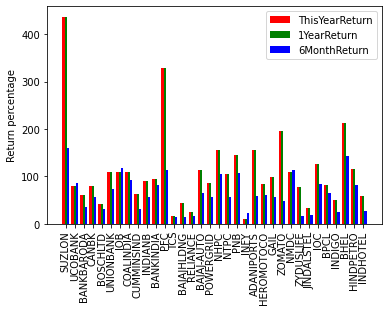

In [5]:
# set width of bar 
barWidth = 0.25
# Set position of bar on X axis 
br1 = np.arange(len(near52weekHigh['ThisYearReturn'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, near52weekHigh['ThisYearReturn'], color ='r', width = barWidth, label ='ThisYearReturn') 
plt.bar(br2, near52weekHigh['1YearReturn'], color ='g', width = barWidth, label ='1YearReturn') 
plt.bar(br3, near52weekHigh['6MonthReturn'], color ='b', width = barWidth, label ='6MonthReturn') 
    
plt.ylabel('Return percentage') 
plt.xticks([r + barWidth for r in range(len(near52weekHigh['symbol']))], 
        near52weekHigh['symbol'],rotation='vertical')
 
plt.legend()
plt.show() 

In [6]:
mktcapital = DF_info[DF_info['marketCap']>60000]
industrialGainer = mktcapital.loc[mktcapital.groupby(['industry'])['1YearReturn'].idxmax()].sort_values(by='1YearReturn', ascending=False)
industrialGainer

,industry,symbol,marketCap,lastPrice,yearHigh,gap,gap%,1YearPreviuosPrice,6MonthPreviuosPrice,3MonthPreviuosPrice,...,3MonthReturn,ThisYearReturn,EPS 2021-03-31,EPS 2022-03-31,EPS 2023-03-31,EPS CAGR,1YearReturnPercentile,6MonthReturnPercentile,3MonthReturnPercentile,ThisYearReturnPercentile
234,Financial Services,IRFC,220986.60,168.95,192.80,-23.85,-14.12,31.15,49.75,72.80,...,134.59,453.02,3.660000,4.660,4.850,15.0,100.000000,99.800399,99.600798,100.000000
430,Capital Goods,SUZLON,66228.19,48.60,48.20,0.40,0.82,9.05,18.65,35.95,...,35.19,437.02,0.128514,-0.210,2.640,353.0,99.800399,98.403194,78.842315,99.800399
377,Construction,RVNL,61414.26,294.55,345.50,-50.95,-17.30,72.30,125.15,154.50,...,90.65,318.13,4.760000,5.320,6.810,20.0,98.203593,97.405190,98.203593,98.203593
497,Consumer Services,ZOMATO,123186.99,143.80,143.50,0.30,0.21,48.75,97.60,123.30,...,16.63,194.97,-1.277844,-1.670,-1.200,-3.0,94.610778,75.748503,49.700599,94.610778
15,Power,ADANIPOWER,215757.23,559.40,589.45,-30.05,-5.37,191.95,273.30,394.00,...,41.98,191.43,0.060000,9.630,24.570,1924.0,94.411178,93.612774,84.630739,94.411178
45,Healthcare,AUROPHARMA,62505.04,1066.75,1177.10,-110.35,-10.34,404.20,868.25,873.80,...,22.45,166.37,91.050000,45.190,32.900,-40.0,93.013972,52.894212,60.179641,93.013972
445,Automobile and Auto Components,TATAMTRDVR,325862.77,586.75,593.95,-7.20,-1.23,223.80,398.90,434.95,...,34.90,163.50,-39.200000,-29.880,6.290,NaN,92.814371,75.449102,78.243513,92.814371
14,Services,ADANIPORTS,272490.85,1261.45,1239.50,21.95,1.74,498.85,791.40,802.50,...,57.19,154.57,24.580000,22.620,24.580,0.0,91.417166,82.435130,91.417166,91.417166
296,Realty,LODHA,107523.36,1114.80,1225.00,-110.20,-9.89,487.33,726.75,861.45,...,29.41,129.39,0.448897,13.140,5.050,235.0,86.826347,79.441118,71.856287,86.826347
231,Oil Gas & Consumable Fuels,IOC,224339.35,162.90,152.20,10.70,6.57,78.45,92.85,99.00,...,72.94,125.10,15.713333,18.230,7.110,-33.0,85.029940,90.818363,95.209581,85.029940


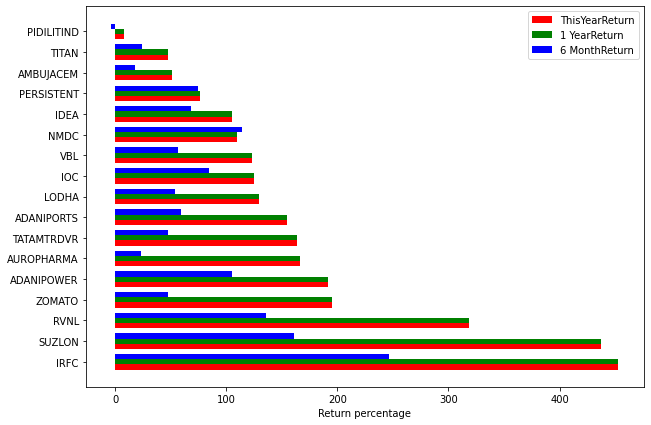

In [7]:
fig = plt.figure(figsize=(10,7))
# set width of bar 
barWidth = 0.25
# Set position of bar on X axis 
br1 = np.arange(len(industrialGainer['ThisYearReturn'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.barh(br1, industrialGainer['ThisYearReturn'], color ='r', height = barWidth, label ='ThisYearReturn') 
plt.barh(br2, industrialGainer['1YearReturn'], color ='g', height = barWidth, label ='1 YearReturn') 
plt.barh(br3, industrialGainer['6MonthReturn'], color ='b', height = barWidth, label ='6 MonthReturn') 
    
plt.xlabel('Return percentage') 
plt.yticks([r + barWidth for r in range(len(industrialGainer['symbol']))], 
        industrialGainer['symbol'],)
 
plt.legend()
plt.show() 

In [8]:
# DF_info.to_csv(r'C:\Users\Admin\Desktop\nifty500stockreturn.csv',index=False)

In [55]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from scipy.stats import percentileofscore

def find_return(data,total_days):
    # Calculate the returns
    nifty_returns =  data.loc[(end_date - timedelta(days=total_days)):]['Adj Close'].pct_change().dropna()

    # Calculate the total return for the last 1 year
    total_return = round(((nifty_returns + 1).prod() - 1)*100,2)
    return total_return

stock_df = pd.read_csv(r'C:\Users\Admin\Desktop\Nifty Sectoral Indices.csv') 

# stock_df = stock_df[stock_df['Symbol'].isin(nifty50_list)].reset_index(drop=True) #use this for NIFTY50 stocks

symbol_info = pd.DataFrame()

# Calculate the start and end dates 
end_date = datetime.today()
start_date = end_date - timedelta(days=365)



In [57]:
stock_df

,Symbol,Index,Company Name
0,TIINDIA,NIFTY AUTO,Tube Investments of India Ltd.
1,TVSMOTOR,NIFTY AUTO,TVS Motor Company Ltd.
2,MRF,NIFTY AUTO,MRF Ltd.
3,BOSCHLTD,NIFTY AUTO,Bosch Ltd.
4,HEROMOTOCO,NIFTY AUTO,Hero MotoCorp Ltd.
...,...,...,...
224,CASTROLIND,NIFTY OIL & GAS,Castrol India Ltd.
225,GUJGASLTD,NIFTY OIL & GAS,Gujarat Gas Ltd.
226,AEGISCHEM,NIFTY OIL & GAS,Aegis Logistics Ltd.
227,PETRONET,NIFTY OIL & GAS,Petronet LNG Ltd.


In [67]:
data = yf.download((stock_df['Symbol']+'.NS').to_list(), start=start_date, end=end_date)
data['Close']['TCS.NS']

[*********************100%***********************]  174 of 174 completed


Date
2023-03-15    3198.899902
2023-03-16    3185.000000
2023-03-17    3179.300049
2023-03-20    3143.300049
2023-03-21    3106.100098
                 ...     
2024-03-07    4108.600098
2024-03-11    4122.350098
2024-03-12    4192.250000
2024-03-13    4149.000000
2024-03-14    4207.600098
Name: TCS.NS, Length: 246, dtype: float64

In [68]:
stock_symbol = data['Close'].columns[0]
stock_symbol

'ABBOTINDIA.NS'

In [73]:
industry = stock_df[stock_df['Symbol']+'.NS'==stock_symbol]['Index'].to_list()
industry

['NIFTY PHARMA', 'NIFTY HEALTH CARE']

In [87]:
%%time
for i in range(len(stock_df)):
    # Create a Ticker object with the stock symbol
    stock_symbol = stock_df.loc[i,'Symbol']
    industry = stock_df.loc[i,'Index']
    
    stock = yf.Ticker(stock_symbol + '.NS')
    
    info = stock.basic_info
    Basic_EPS = stock.incomestmt.loc['Basic EPS']
    quarterly_BasicEPS = stock.quarterly_incomestmt.loc['Basic EPS']
    
    balancesheet = stock.balancesheet

CPU times: total: 16.4 s
Wall time: 4min 12s


In [ ]:
for i in range(len(stock_df)):
    # Create a Ticker object with the stock symbol
    stock_symbol = stock_df.loc[i,'Symbol']
    industry = stock_df.loc[i,'Index']
    
    stock = yf.Ticker(stock_symbol + '.NS')
    
    info = stock.basic_info
    stock_data = yf.download(stock_symbol+'.NS', start=start_date, end=end_date)
    Basic_EPS = stock.incomestmt.loc['Basic EPS']
    quarterly_BasicEPS = stock.quarterly_incomestmt.loc['Basic EPS']
    
    balancesheet = stock.balancesheet
    Equity = balancesheet.loc['Stockholders Equity']
    try:
        TotalDebt = balancesheet.loc['Total Debt']
    except:
        pass
    
    row = len(symbol_info)
    symbol_info.at[row,'Index'] = industry
    symbol_info.at[row,'symbol'] = stock_symbol
    try:
        symbol_info.at[row,'marketCap'] = round(info['marketCap']/10000000,2)
        symbol_info.at[row,'lastPrice'] = round(info['lastPrice'],2)
        symbol_info.at[row,'yearHigh'] = round(info['yearHigh'],2)
        symbol_info.at[row,'gap'] = round(info['lastPrice'] - info['yearHigh'],2)
        symbol_info.at[row,'gap%'] = round((info['lastPrice'] - info['yearHigh'])/info['lastPrice']*100,2)
        symbol_info.at[row,'1YearPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=365)):]['Close'].iloc[0],2)
        symbol_info.at[row,'6MonthPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=180)):]['Close'].iloc[0],2)
        symbol_info.at[row,'3MonthPreviuosPrice'] = round(stock_data.loc[(end_date - timedelta(days=90)):]['Close'].iloc[0],2)
        symbol_info.at[row,'1YearReturn'] = find_return(stock_data,365)
        symbol_info.at[row,'6MonthReturn'] = find_return(stock_data,180)
        symbol_info.at[row,'3MonthReturn'] = find_return(stock_data,90)
        symbol_info.at[row,'ThisYearReturn'] = find_return(stock_data.loc['2023-01-01':],365)

        for E in Basic_EPS.index:
            symbol_info.at[row,(f"EPS-{E.strftime('%Y')}")] = round(Basic_EPS.loc[E],2)
            
        symbol_info.at[row,'EPS CAGR'] =  round(((Basic_EPS.iloc[0] / Basic_EPS.iloc[-1]) ** (1 / 2) - 1)*100)
        
        for i in quarterly_BasicEPS.index:
            symbol_info.at[row,(f"EPS-{i.strftime('%b %Y')}")] = round(quarterly_BasicEPS.loc[i],2)
            
        for D in TotalDebt.index:
            symbol_info.at[row,(f"Debt-{D.strftime('%Y')}")] = TotalDebt.loc[D]/Equity[D]*100
            
    except:
        pass
    
symbol_info['1YearReturnPercentile'] = symbol_info['1YearReturn'].apply(lambda x: percentileofscore(symbol_info['1YearReturn'], x))
symbol_info['6MonthReturnPercentile'] = symbol_info['6MonthReturn'].apply(lambda x: percentileofscore(symbol_info['6MonthReturn'], x))
symbol_info['3MonthReturnPercentile'] = symbol_info['3MonthReturn'].apply(lambda x: percentileofscore(symbol_info['3MonthReturn'], x))
symbol_info['ThisYearReturnPercentile'] = symbol_info['ThisYearReturn'].apply(lambda x: percentileofscore(symbol_info['ThisYearReturn'], x))
